<a href="https://colab.research.google.com/github/edelgado-1975/PythonSena/blob/main/15_PF_otros_conceptos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

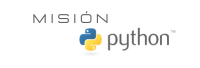

# Programación Funcional en Python


## Decoradores (Funciones Decoradoras)

Las funciones decoradoras envuelven la ejecución de otra función y permiten extender su comportamiento.  



Supongamos que queremos ampliar el comportamiento de una función existente cualquiera simplemente añadiendo una línea antes de su ejecución y otra línea despues de su normal ejecución.  El código sería algo así:

In [ ]:
def mi_decorador (funcion_a_decorar):  #creamos el decorador y recibe la funcion a decorar
    print ("inicio ___________________________") #extensión de funcionalidad (decoraciones)
    funcion_a_decorar()   #invocación de la función original
    print ("_______________________________fin") #extensión de funcionalidad (decoraciones)

def saludo():
  print ("Hola Mundo Decorador")

def despedida():
  print ("Adios Mundo Decorador")

mi_decorador(saludo)




Hasta este punto hemos logrado el objetivo, pero no hemos usado los decoradores.  

La sintaxis para crear un decorador es igual a la sintaxis para definir una función, por eso le llaman funciones decoradoras.  

La "invocación" de una función decoradora se hace con el signo **@** y el nombre de la función decoradora.  Esto se debe realizar justo antes de la declaración de la función a ser decorada.

Ya hemos usado decoradores antes en nuestros programas.  Recordemos algunos:

@property

@classmethod

@staticmethod

@abstractmethod

Ahora aprenderemos a crear nuestros propios decoradores usando funciones decoradoras.

Sintaxis general:



```
def decorador (funcion):
  def decorar (parametros_funcion):
     #usamos y extendemos el comportamiento
     #de la funcion
  retornamos decorar


@decorador
def funcion_a_decorar():
   codigo de la funcion
```



Presentamos el mismo ejemplo, pero esta vez usando decoradores:

In [ ]:
def lineas (funcion_a_decorar):  #creamos el decorador y recibe la funcion a decorar
  def xxx(): #funcion interna que extiende la funcionalidad (decora)
    print ("inicio ___________________________") #extensión de funcionalidad (decoraciones)
    funcion_a_decorar()   #invocación de la función original
    print ("_______________________________fin") #extensión de funcionalidad (decoraciones)
  return xxx  #retorno de la función decorada

@lineas
def saludo():
  print ("Hola Mundo Decorador")


def despedida():
  print ("Adios Mundo Decorador")

@lineas
def sumar():
  print(3+4)

saludo()
despedida()
sumar()


Como podemos ver, en las líneas 8 y 12 se invoca al decorador (función decoradora) y la función que se declara inmediatamente después es la misma que se envía como parámetro.  De esta manera, las funciones originales (saludo() y despedida()) quedan decoradas fácilmente.

**Decorando funciones que reciben argumentos**

Podemos enviar los parámetros de la función a decorar como parámetros de la función interna de la función decoradora.  Miremos:

In [ ]:
def mi_decorador (funcion_a_decorar):
  def decoracion(nombre): #acá recibimos los parámetros de la función a decorar
    print ("inicio ___________________________")
    funcion_a_decorar(nombre)
    print ("_______________________________fin")
  return decoracion

@mi_decorador
def saludo(nombre):
  print ("Hola Mundo Decorador", nombre)

@mi_decorador
def despedida(nombre):
  print ("Adios Mundo Decorador", nombre)

saludo("juan")
despedida("pedro")

Pero, qué ocurre si como es natural a la hora de crear decoradores, **no sabemos qué funciones los van a utilizar y mucho menos los parámetros que esas funciones van a tener?**  

**¿Podrías terminar el siguiente código para que funcione correctamente en todas las funciones decoradas?**


---



In [ ]:
def mi_decorador (funcion_a_decorar):
  def decoracion(*args): #acá recibimos los parámetros de la función a decorar
    print ("inicio ___________________________")
    funcion_a_decorar(*args)
    print ("_______________________________fin")
  return decoracion

@mi_decorador
def saludo():
  print ("Hola")

@mi_decorador
def saludo_personal(nombre):
  print ("Hola", nombre)

@mi_decorador
def saludo_personal_formal(nombre, titulo_cortesia):
  print ("Hola", titulo_cortesia, nombre)

@mi_decorador
def sumar(a,b):
  print(a+b)

saludo()
saludo_personal("Carlos")
saludo_personal_formal("Diego", "Doctor")
sumar(4,5)

**Cree una función decoradora que se invoque de la siguiente manera:**


---



```
@solopositivos
```
Este decorador se asegurará de que todos los parámetros que reciba la función decorada sean números positivos, en caso contrario, debe lanzar una excepción de tipo TypeError







In [ ]:
def solopositivos(funcion_recibida):
  def pepito(*args):
    for parametro in args:
      if not isinstance(parametro,(int,float)) or parametro < 0:
        raise TypeError ("Uno o varios de los parámetros no es un número positivo")
    funcion_recibida(*args)

  return pepito

@solopositivos
def sumar(x, y):
  print (x + y)

@solopositivos
def multiplicar(x, y):
  print (x * y)

sumar(40,5)
multiplicar(5,"w")


Ejercicio:  
Realizar un decorador que quite los espacios antes y después de cada parámetro de tipo string que reciban las funciones a decorar

## List Comprehensions (comprensión de listas)

Podemos crear listas con los valores generados a partir de otros objetos iterables de una forma concisa y eficiente.  Generalmente necesitaremos de una sola línea para ello.  Esto lo denominamos comprensión de listas.  Miremos:
  

Queremos una función que reciba un número y devuelva una lista con los números pares comprendidos entre 1 y el número recibido.

**Sin comprensión de listas:**

In [ ]:
def pares(num):
  par = []
  for x in range(1, num+1):
    if x % 2 == 0:
      par.append(x)
  return par

print(pares(50))

**Con comprensión de listas**

In [ ]:
def pares (num):
  return  [x for x in range(1,num+1)  if x % 2 == 0]

print (pares(50))

Como podemos apreciar en este sencillo ejemplo, pasamos de 5 líneas de código a solo 1 línea de código usando la comprensión de listas.

La sintaxis en la comprensión de listas es la siguiente:


```
[expresion for variable in iterable]
```
La condición es opcional,  en caso de existir, la sintaxis sería:


```
[expresion for variable in colección if condición]
```

Crear e imprimir una lista con los primeros 10 números

In [ ]:
print ([i for i in range (1,11)])

Crear e imprimir una lista con los números múltiplos de 3 que se encuentran entre el 1 y el 100

In [ ]:
lista_objetivo = [x for x in range(1,101) if x % 3 == 0]
print (len(lista_objetivo))

El iterable del for puede ser de cualquier tipo, no solamente de tipo range.  Miremos:

Ejemplo Iterable tipo lista:

In [ ]:
lista = [2,5,6,8,9,0,11,4]

res = [x for x in lista if x % 2 == 0]
print (res)

Ejemplo Iterable tipo tupla:

In [ ]:
tupla = (2,5,6,8,9,0,11,4)
res = [x for x in tupla if x % 2 == 0]
print (res)

Ejemplo Iterable tipo conjunto:

In [ ]:
print ([x for x in {2,5,6,8,9,0,11,4} if x % 2 == 0])


Ejemplo Iterable tipo diccionario:

In [ ]:
diccionario = {1:2, 2:5, 3:6, 4:8, 5:9, 6:0, 7:11, 8:4}
res = [x for x in diccionario.values() if x % 2 == 0]
print (res)

**Cree una función que reciba un diccionario cuyas llaves son los nombres de estudiantes y valores sus edades.  Esta función debe retornar una lista por comprensión con los nombres de los estudiantes menores de edad.**


---



In [ ]:
def funcion1(estudiantes):
  return [est for est in estudiantes.keys() if estudiantes[est]<18]


dicc = {"juan":20,"luis":10,"diego":24,"lina":16,"carlos":17}
print (funcion1(dicc))

**Cree una función que reciba una lista de palabras y retorne una lista por comprensión de la longitud de cada palabra.  Ejemplo, si la lista que recibe es ["casa", "uno", "radioactiva"] la lista devuelta debe ser   [4, 3, 11]**


---



In [ ]:
def recibir_palabras(lista_palabras):
  return [len(palabra)  for palabra in lista_palabras]

print(recibir_palabras(["sena","armenia","retroactivo","bocadillo"]))

**Crear una lista por comprensión de números pares a partir de otra lista por comprensión creada con las potencias de 2 de los primeros 10 números.  Use una sola línea de código para crear las listas y comprobarlas**


---



In [ ]:
print([i**2  for i in range(1,11)])

In [ ]:
print ([j  for j in [i**2  for i in range(1,11)] if j%2==0])


In [ ]:
print ([i**2  for i in range(1,11) if i%2==0])

Las listas por comprensión no solo generan listas, de manera análoga pueden generar otros tipos de colecciones.

Ejemplo generando una tupla:

In [ ]:
mi_tupla = tuple(x for x in range (10))
print (mi_tupla)

Ejemplo generando un conjunto:

In [ ]:
mi_conjunto = {x for x in range (10)}
print (type(mi_conjunto))
print (mi_conjunto)

Ejemplo generando un diccionario:

In [ ]:
mi_diccionario = {x:chr(x) for x in range (97,123)}
print (type(mi_diccionario))
print (mi_diccionario)

In [ ]:
mi_diccionario = {x:input("ingrese valor") for x in range (3) }
print (type(mi_diccionario))
print (mi_diccionario)

**Cree una función que reciba dos listas (nombres y telefonos) la función debe retornar un diccionario por comprensión con los nombres como llaves y los teléfonos como valores siempre y cuando las listas recibidas de nombres y teléfonos tengan la misma cantidad de elementos, en caso contrario generar una excepción de tipo ValueError**


---



Le han dado el siguiente código que permite generar una lista con las posibles combinaciones de los nombres de las personas de una listas de nombres dada

In [ ]:
def combinar_nombres(nombres):
  nombres_compuestos=[]
  for nombre1 in nombres:
      for nombre2 in nombres:
          if nombre1!=nombre2:
              nombres_compuestos.append([nombre1, nombre2])
  return nombres_compuestos

nombres=['Andres','Julian','Mauricio','Felipe']
print(combinar_nombres(nombres))

**Se le pide que optimice el código generando la lista con la combinación de nombres mediante list comprehensions**


---

